In [7]:
import cv2 as cv

imgPath = "/content/opencvTest.png"

img = cv.imread(imgPath)

height, width, channels = img.shape

pixelsNo= img.size

print(f"Height: {height}\nWidth: {width}\nChannels: {channels}\nPixels: {pixelsNo}")

Height: 638
Width: 806
Channels: 3
Pixels: 1542684


This cell below is left intentionally to understand that we shouldn't use cv.imshow()

In [10]:
cv.imshow("Img Title",img)

DisabledFunctionError: cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow


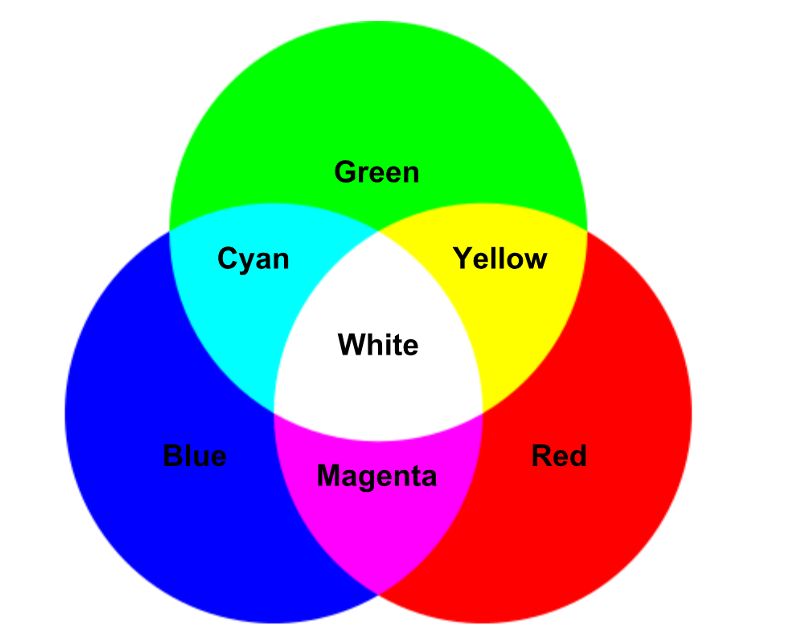

In [13]:
from google.colab.patches import cv2_imshow

cv2_imshow(img)

In [19]:
b, g, r = img[300, 150]
print(f"blue: {b}, green: {g}, red: {r}")

blue: 255, green: 0, red: 0


In [20]:
b = img[300, 150, 0]
print(b)

255


In [22]:
b = img[300, 150][0]
print(b)

255


From these 2 cells above, both `img[300, 150, 0]` && `img[300, 150][0]` are equivalent.
both returns the first value of the tuple returned by `img[300, 15]`

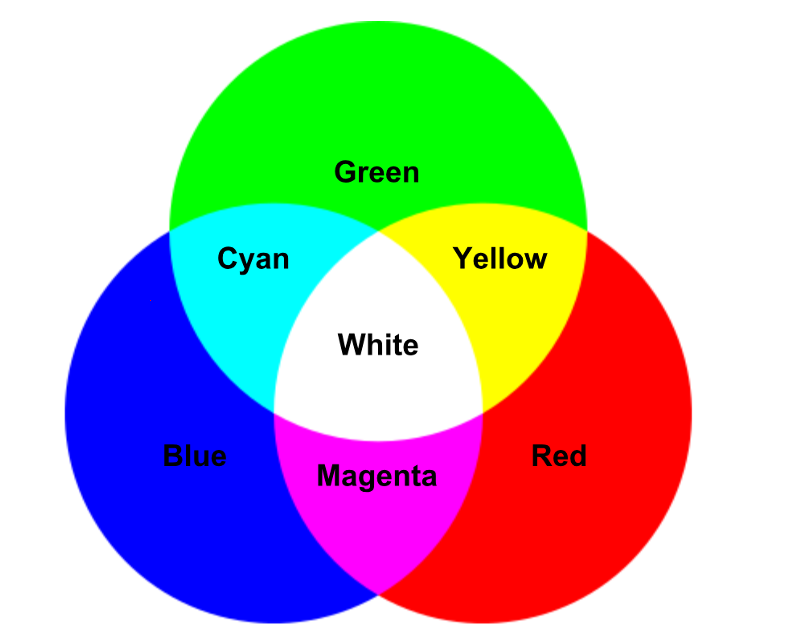

In [25]:
#Let's make this pixel red instead of blue

img[300, 150] = (0, 0, 255)
cv2_imshow(img)

#if you can focus enough, you'll notice that it turned to red HAHAHAHAHAH.. totally unexpected :/

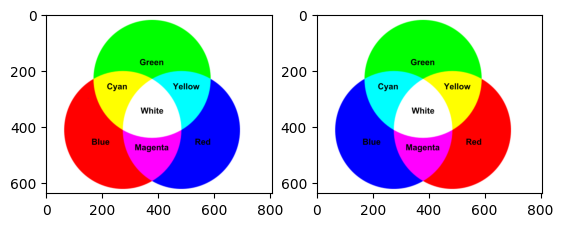

In [29]:
import matplotlib.pyplot as plt

b, g, r = cv.split(img)

img_matplot= cv.merge([r, g ,b])

#https://www.w3schools.com/python/matplotlib_subplot.asp
plt.subplot(121)
plt.imshow(img) #img is the opencv original image
plt.subplot(122)
plt.imshow(img_matplot)

plt.show()

Because opencv represent images in BGR, you have to reverse it so that it looks like the original image when it's shown by matplotlib.
That's true cuz matplotlib represent images in RGB.

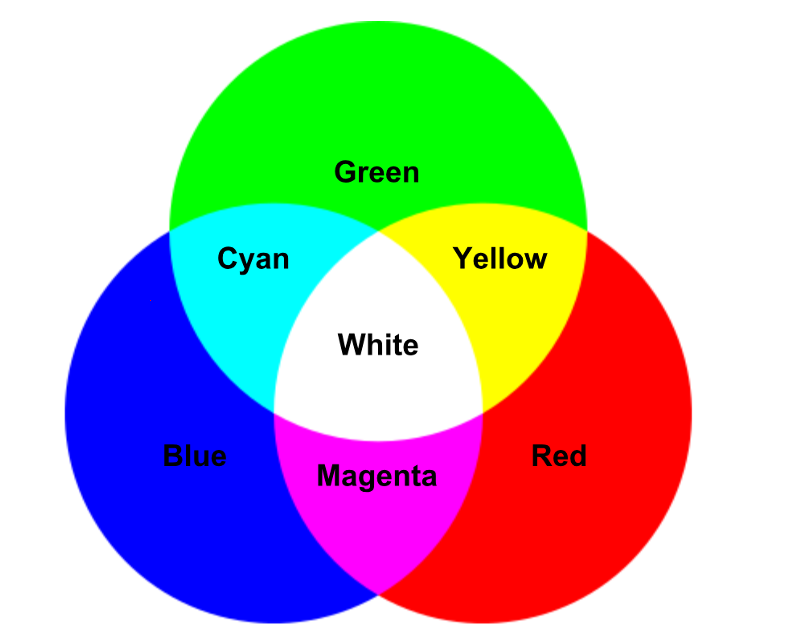

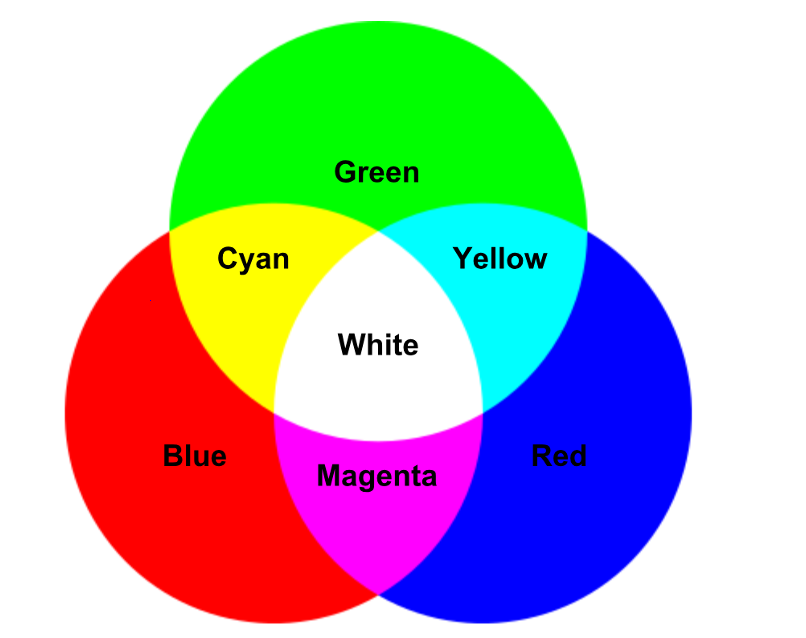

In [31]:
cv2_imshow(img)
cv2_imshow(img_matplot)

The same thing happens when we try to show the matplotlib image with the opencv imshow() method.
It takes the value switches the values of R and B.

When we pass the loaded by the cv.imread(), it shown without any reversal.



---



To join these 2 images in a single horizontal image, we can use `concatenate()` method from the **numpy** module.

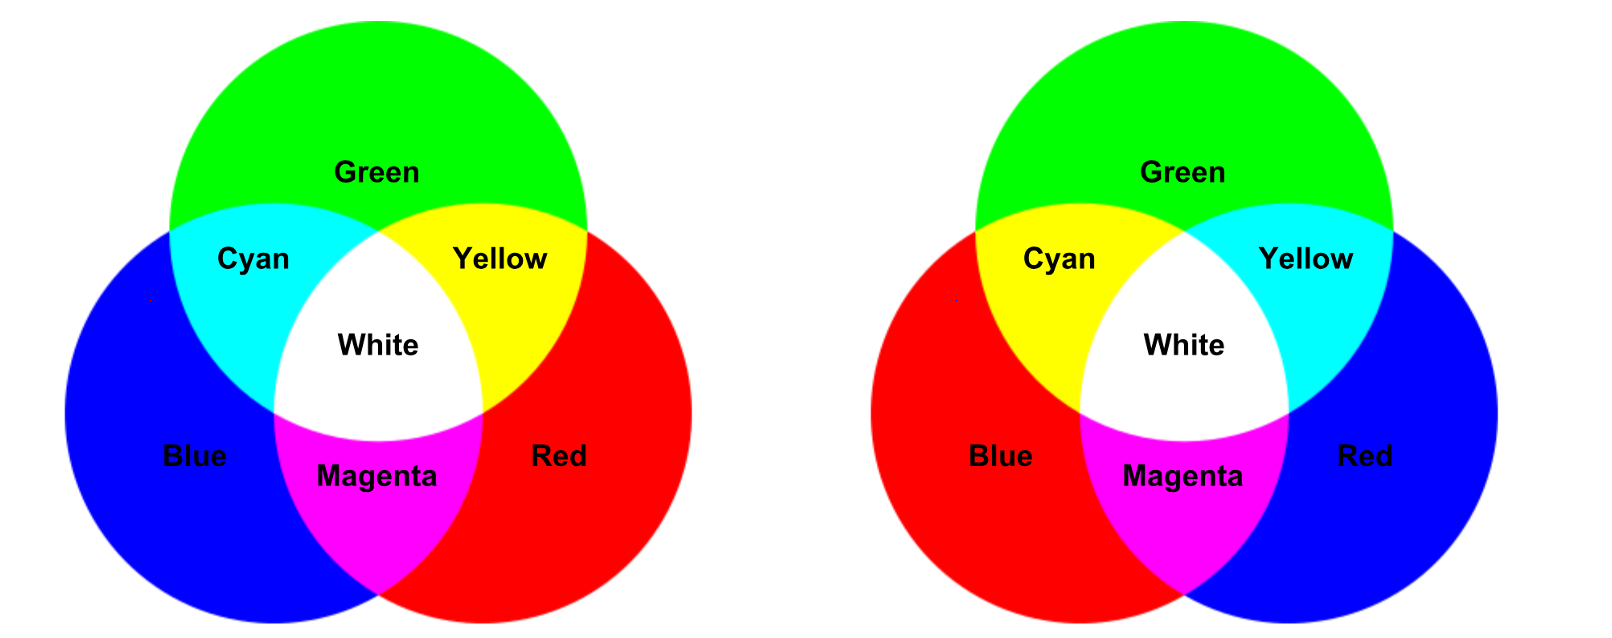

In [33]:
import numpy as np

img_concats = np.concatenate((img, img_matplot), axis= 1)

cv2_imshow(img_concats)



---



Actually, it's recommended to do what we've done above using **numpy indexing** instead of using `cv2.split()` cuz split() method is time consuming.

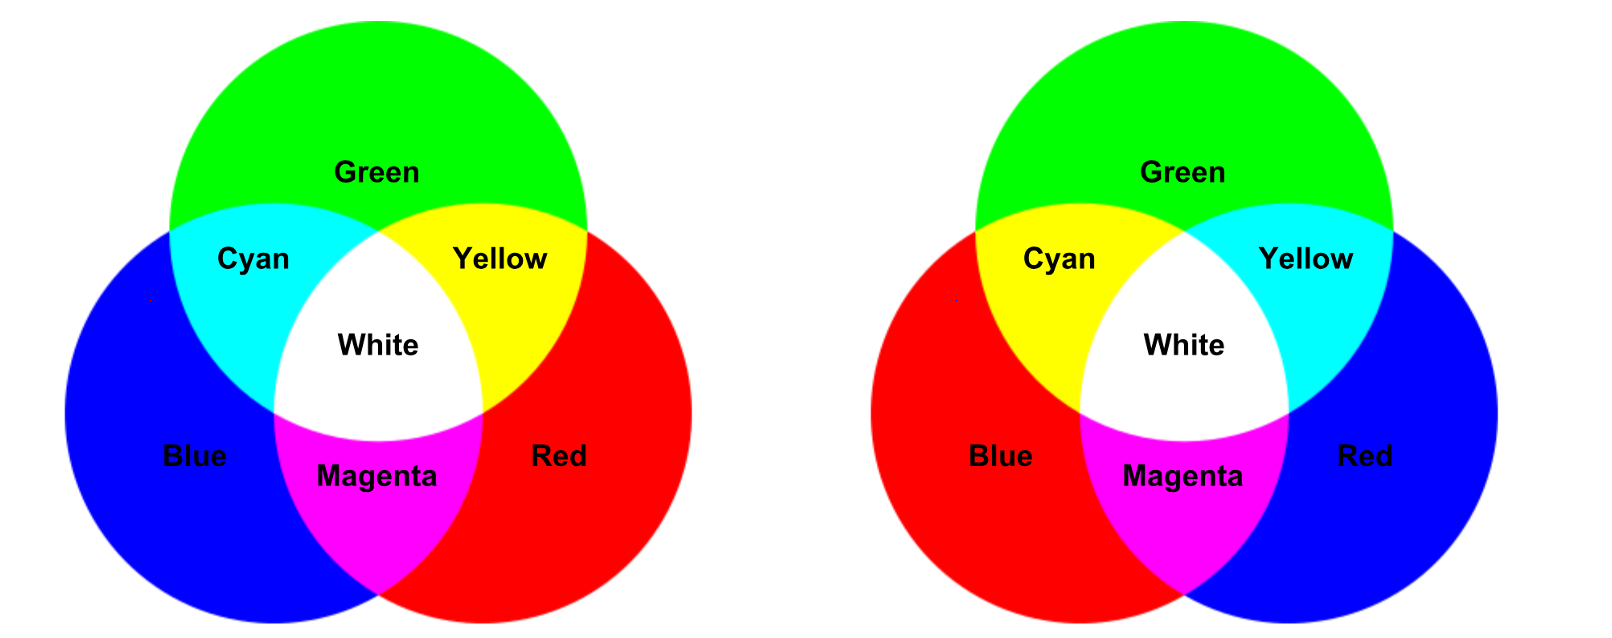

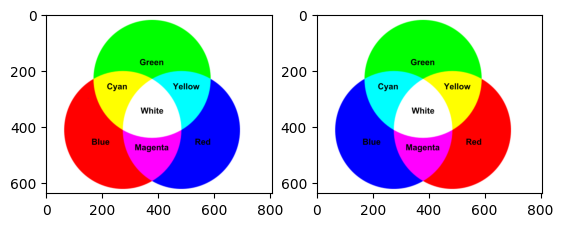

In [37]:
#The blue channel part
B = img[:, :, 0]
#Note that we specify a range of rows and a range of cols using the colon :
#Since we don't provide any boundaries for the range,
#it means all rows and all columns.

#The Green channel part
G = img[:, :, 1]
#The Red channel part
R = img[:, :, 2]

#Reverse opencv_img colors to get an RGB image
img_matplot= img[:, :, ::-1]

#The ::-1 step flips the order of the last dimension, turning BGR into RGB.
#It's a basic slicing trick to flip a list.
#:: means from the start to the end, and -1 means that we do a reversed traversal.

img_concats = np.concatenate((img, img_matplot), axis= 1)
cv2_imshow(img_concats)


plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(img_matplot)

plt.show()